Import Library

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Load dataset

In [46]:
df=pd.read_csv('student_info.csv')
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [47]:
df.shape

(200, 2)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
study_hours      195 non-null float64
student_marks    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [49]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


# Visulize data

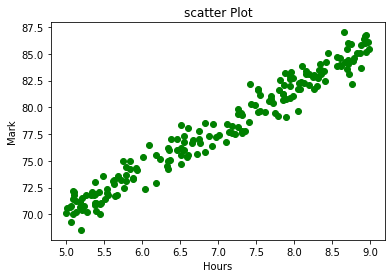

In [50]:
plt.scatter(x=df.study_hours,y=df.student_marks,c='g')
plt.xlabel('Hours')
plt.ylabel('Mark')
plt.title('scatter Plot')
plt.show()

# Cleaning data

In [70]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [75]:
mean_h=df.study_hours.mean()
df.study_hours=df.study_hours.fillna(mean_h)

In [76]:
#df2.isnull().sum()
df.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


split dataset

In [80]:
X = df.drop("student_marks", axis = "columns")
Y = df.drop("study_hours", axis = "columns")
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

Select Model

In [81]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
lr.coef_

array([[3.88956921]])

In [83]:
lr.intercept_

array([50.75796659])

In [90]:
lr.predict([[3]])[0][0].round(2)

62.43

In [92]:
y_pred=lr.predict(x_test)
y_pred

array([[78.72396924],
       [70.28360404],
       [77.96919334],
       [84.94727998],
       [81.32998061],
       [76.4291234 ],
       [84.8305929 ],
       [79.19071754],
       [85.56961105],
       [81.13550215],
       [83.04139106],
       [77.67378555],
       [71.72274465],
       [84.55832306],
       [79.65746585],
       [85.64740244],
       [81.71893753],
       [84.67501013],
       [70.94483081],
       [81.40777199],
       [79.34630031],
       [71.13930927],
       [71.72274465],
       [78.99623908],
       [71.95611881],
       [70.55587389],
       [71.9950145 ],
       [75.37893971],
       [78.99623908],
       [77.96919334],
       [80.902128  ],
       [73.16188526],
       [80.00752708],
       [70.40029112],
       [85.45292398],
       [71.76164034],
       [84.79169721],
       [84.05267906],
       [80.04642277],
       [77.86826401]])

In [94]:
pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual Value','Predict Value'])

,Actual Value,Predict Value
0,78.21,78.723969
1,70.58,70.283604
2,76.14,77.969193
3,84.60,84.947280
4,81.25,81.329981
5,75.55,76.429123
6,82.21,84.830593
7,77.59,79.190718
8,85.15,85.569611
9,82.55,81.135502


In [95]:
lr.score(x_test,y_test)

0.952823978445243

# Save ML model

In [96]:
import joblib
joblib.dump(lr, "Predict Student Mark.pkl")

['Predict Student Mark.pkl']

In [97]:
model = joblib.load("Predict Student Mark.pkl")

In [98]:
model.predict([[9]])

array([[85.76408951]])